In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# imports
import sys
sys.path.append("..")
#import os
#import shutil

from utils.model import Net_mask
import torch
#from torch.distributions.multivariate_normal import MultivariateNormal

import matplotlib.pyplot as plt
import numpy as np

In [4]:
num = 1
e = 4

In [5]:
prior_weights = torch.load(f'../data/1.0e+0{e}/rml_noise/{num}/noise_parameter.pt')[0]

In [6]:
model = Net_mask()
#model.load_state_dict(torch.load('../saved_models/rml/short/e5/pos/0/model_weights.pth'))
model.load_state_dict(torch.load(f'../saved_models/rml/long/e{e}/pos/{num}/model_weights.pth'))

<All keys matched successfully>

In [7]:
posterior_weights = torch.cat([param.view(-1) for param in model.parameters()])

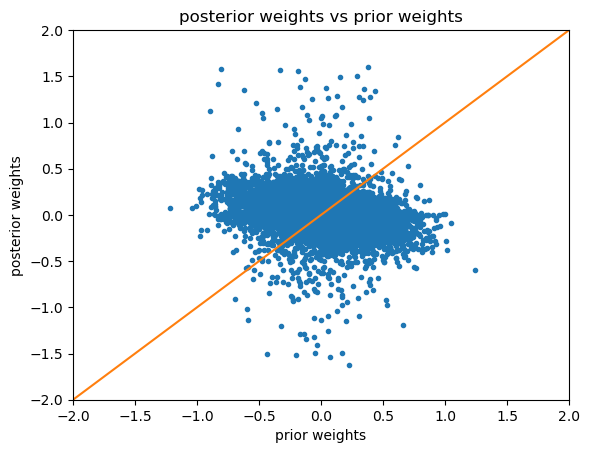

In [8]:
plt.plot(prior_weights.detach(), posterior_weights.detach(), '.')
plt.plot([-2, 2], [-2, 2])
plt.axis([-2, 2, -2, 2])
plt.xlabel('prior weights')
plt.ylabel('posterior weights')
plt.title('posterior weights vs prior weights')
plt.savefig(f'../figures/plot_weights/plot_weights.png')

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 3.000e+00, 5.000e+00, 4.000e+00, 2.000e+00,
        6.000e+00, 4.000e+00, 1.000e+00, 4.000e+00, 5.000e+00, 3.000e+00,
        5.000e+00, 5.000e+00, 9.000e+00, 1.000e+00, 4.000e+00, 7.000e+00,
        1.000e+01, 1.200e+01, 9.000e+00, 8.000e+00, 1.300e+01, 1.100e+01,
        2.300e+01, 2.200e+01, 2.400e+01, 2.700e+01, 2.500e+01, 2.500e+01,
        3.900e+01, 4.600e+01, 4.800e+0

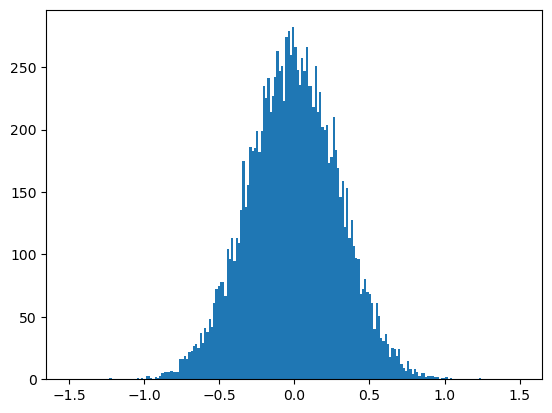

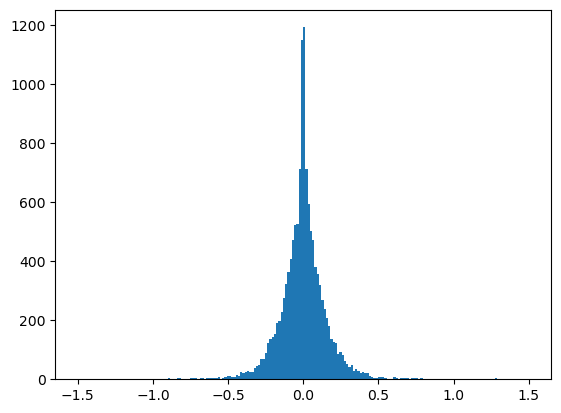

In [9]:
plt.figure(1)
plt.hist(prior_weights.detach(), range=[-1.5, 1.5], bins=200)
plt.figure(2)
plt.hist(posterior_weights.detach(), range=[-1.5, 1.5], bins=200)

In [10]:
prior_numpy = prior_weights.detach().numpy()
print(prior_numpy)
posterior_numpy = posterior_weights.detach().numpy()
#prior_sorted = prior_numpy.copy()
#posterior_sorted = posterior_numpy.copy()
prior_sorted_numpy = np.sort(prior_numpy)
posterior_sorted_numpy = np.sort(posterior_numpy)
#print(prior_numpy)
#print(a)
#np.sort(posterior_sorted)
#prior_sorted_numpy = prior_sorted.numpy()
#posterior_sorted_numpy = posterior_sorted.numpy()
#print(prior_numpy)
#print(prior_sorted)

[ 0.16027758 -0.5250177   0.04666639 ...  0.14286387 -0.03711979
 -0.2903875 ]


In [11]:
print(torch.mean(prior_weights))
print(torch.std(prior_weights))
print(torch.mean(posterior_weights))
print(torch.std(posterior_weights))

tensor(-0.0068)
tensor(0.3000)
tensor(-0.0004, grad_fn=<MeanBackward0>)
tensor(0.1785, grad_fn=<StdBackward0>)


Text(0, 0.5, 'prior')

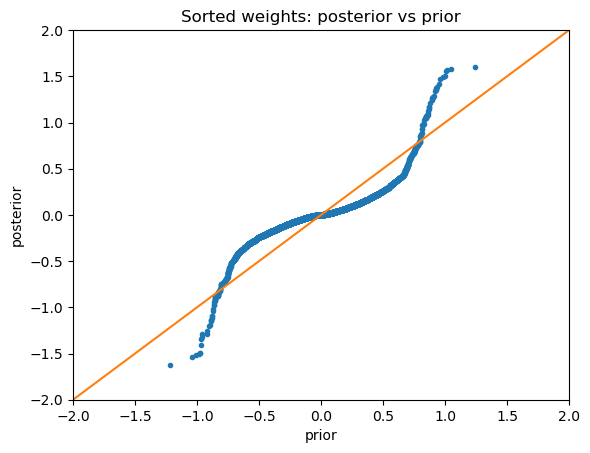

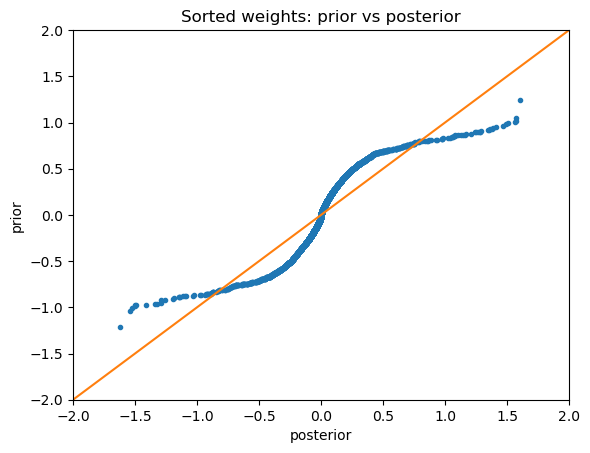

In [12]:
plt.figure()
plt.title('Sorted weights: posterior vs prior')
plt.plot(prior_sorted_numpy, posterior_sorted_numpy, '.')
plt.plot([-2, 2], [-2, 2])
plt.axis([-2, 2, -2, 2])
plt.xlabel('prior')
plt.ylabel('posterior')
plt.figure()
plt.title('Sorted weights: prior vs posterior')
plt.plot(posterior_sorted_numpy, prior_sorted_numpy, '.')
plt.plot([-2, 2], [-2, 2])
plt.axis([-2, 2, -2, 2])
plt.xlabel('posterior')
plt.ylabel('prior')